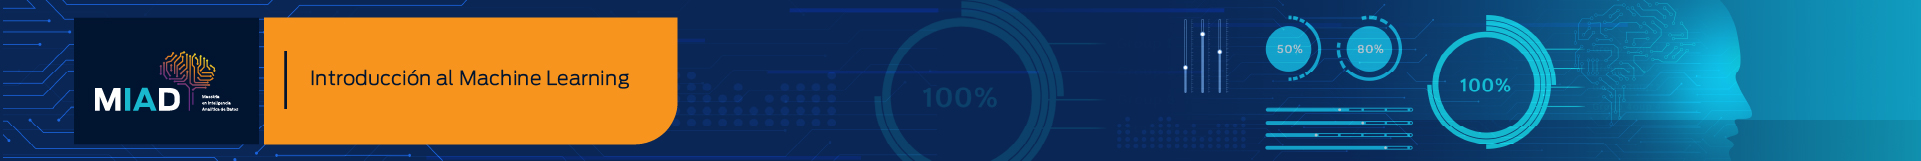

# Introducción al Machine Learning - Semana 2
## Caso: Modelos lineales para regresión, muestreo y selección del mejor modelo

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos lineales de componentes principales, partial least squares y regularización.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación del modelo usando componentes principales: Se estima el modelo usando componentes principales, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación del modelo usando PCA y el método forward: Se estima el modelo usando el método forward con componentes principales, se responde si es el mismo modelo del punto 2, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [30 puntos] 

Estimación del modelo de partial least squares: Se estima el modelo usando partial least squares, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación de un modelo de penalización: Se estima algún modelo de penalización, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [15 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [5 puntos] 


### Datos

Existe gran variedad de bases de datos reales disponibles en internet usadas por la comunidad académica para la evaluación de modelos predictivos.

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Hitters", la cual contiene 20 variables de jugadores de la Major League Baseball en las temporadas de 1986 y 1987. De esta manera, el objetivo de la actividad es predecir el salario de un jugador basado en las características que describen las variables predictivas.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-hitters

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [1]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import warnings

In [2]:
#Lectura de archivo fuente
df1 = pd.read_csv('./dataset-87300.csv', index_col=False)
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5


In [3]:
#Dimensiones originales de dataset
df1.shape

(322, 20)

In [4]:
#Variables de dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    object 
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    int64  
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    object 
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    int64  
 19  NewLeague  263 non-null    float64
dtypes: float64

In [5]:
#Eliminando variables categóricas
df1.drop(['AtBat', 'Division', 'PutOuts'], axis=1, inplace=True)

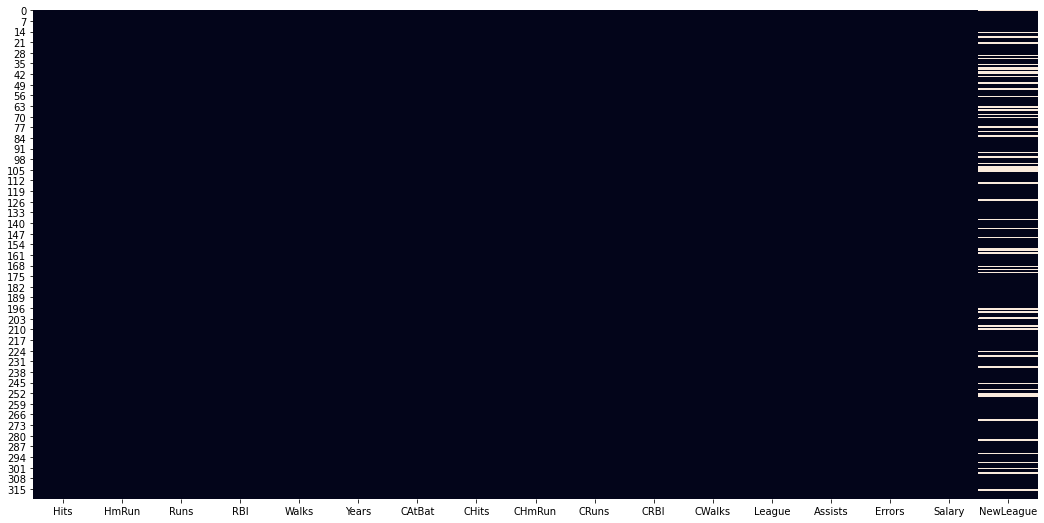

In [6]:
#Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [7]:
#Eliminando observaciones con datos faltantes
df1.dropna(how='any', axis=0, inplace=True)

#Dimensiones de dataset post cambios
df1.shape

(263, 17)

In [8]:
#Estadísticas descriptivas
for i, col in enumerate(df1.columns):
    print(df1[col].describe(), '\n')

count    263.000000
mean     403.642586
std      147.307209
min       19.000000
25%      282.500000
50%      413.000000
75%      526.000000
max      687.000000
Name: Hits, dtype: float64 

count    263.000000
mean     107.828897
std       45.125326
min        1.000000
25%       71.500000
50%      103.000000
75%      141.500000
max      238.000000
Name: HmRun, dtype: float64 

count    263.000000
mean      11.619772
std        8.757108
min        0.000000
25%        5.000000
50%        9.000000
75%       18.000000
max       40.000000
Name: Runs, dtype: float64 

count    263.000000
mean      54.745247
std       25.539816
min        0.000000
25%       33.500000
50%       52.000000
75%       73.000000
max      130.000000
Name: RBI, dtype: float64 

count    263.000000
mean      51.486692
std       25.882714
min        0.000000
25%       30.000000
50%       47.000000
75%       71.000000
max      121.000000
Name: Walks, dtype: float64 

count    263.000000
mean      41.114068
std       21.7

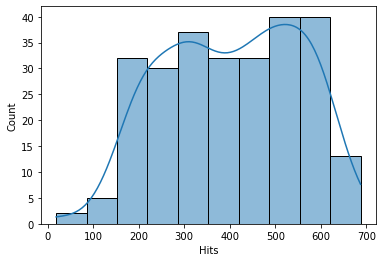

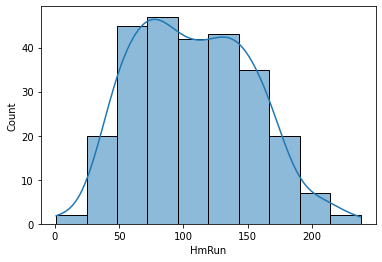

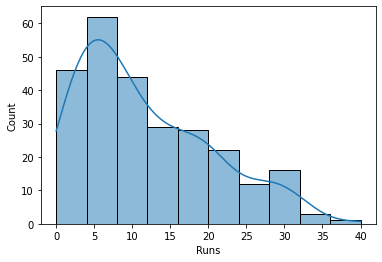

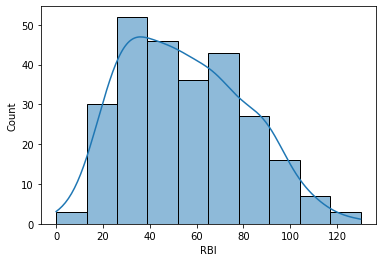

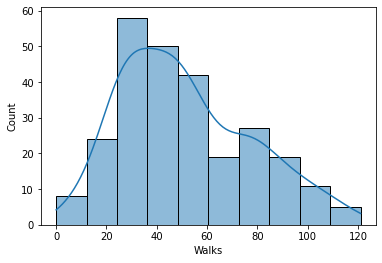

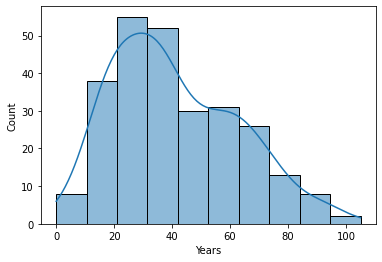

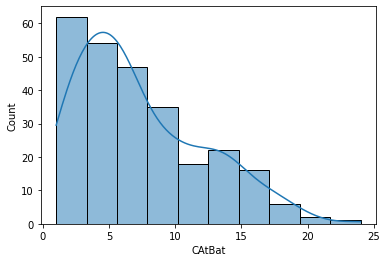

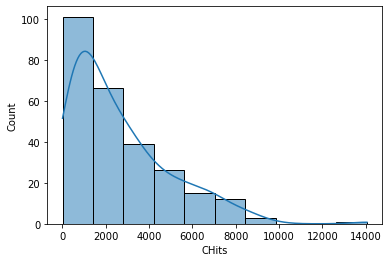

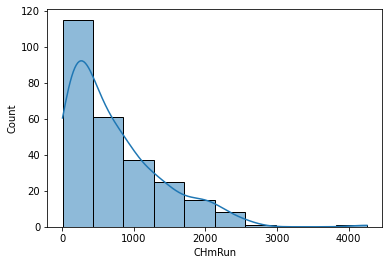

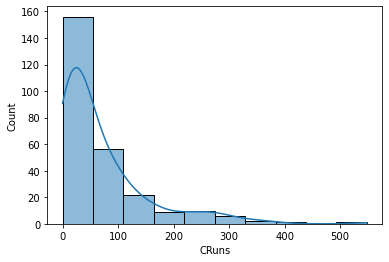

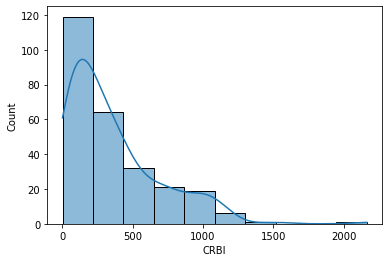

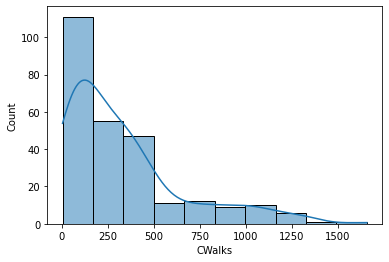

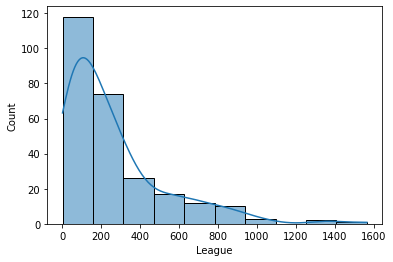

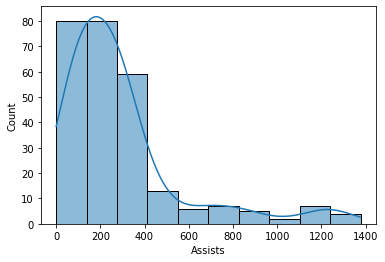

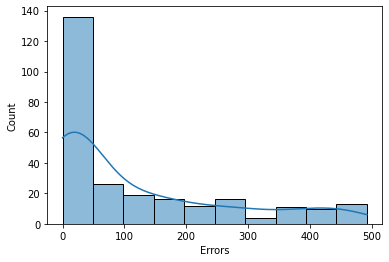

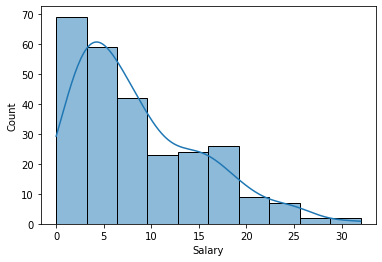

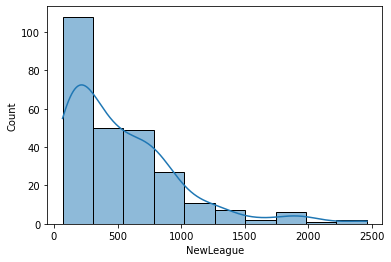

In [9]:
#Histogramas
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.histplot(df1[col], bins=10, kde=True)

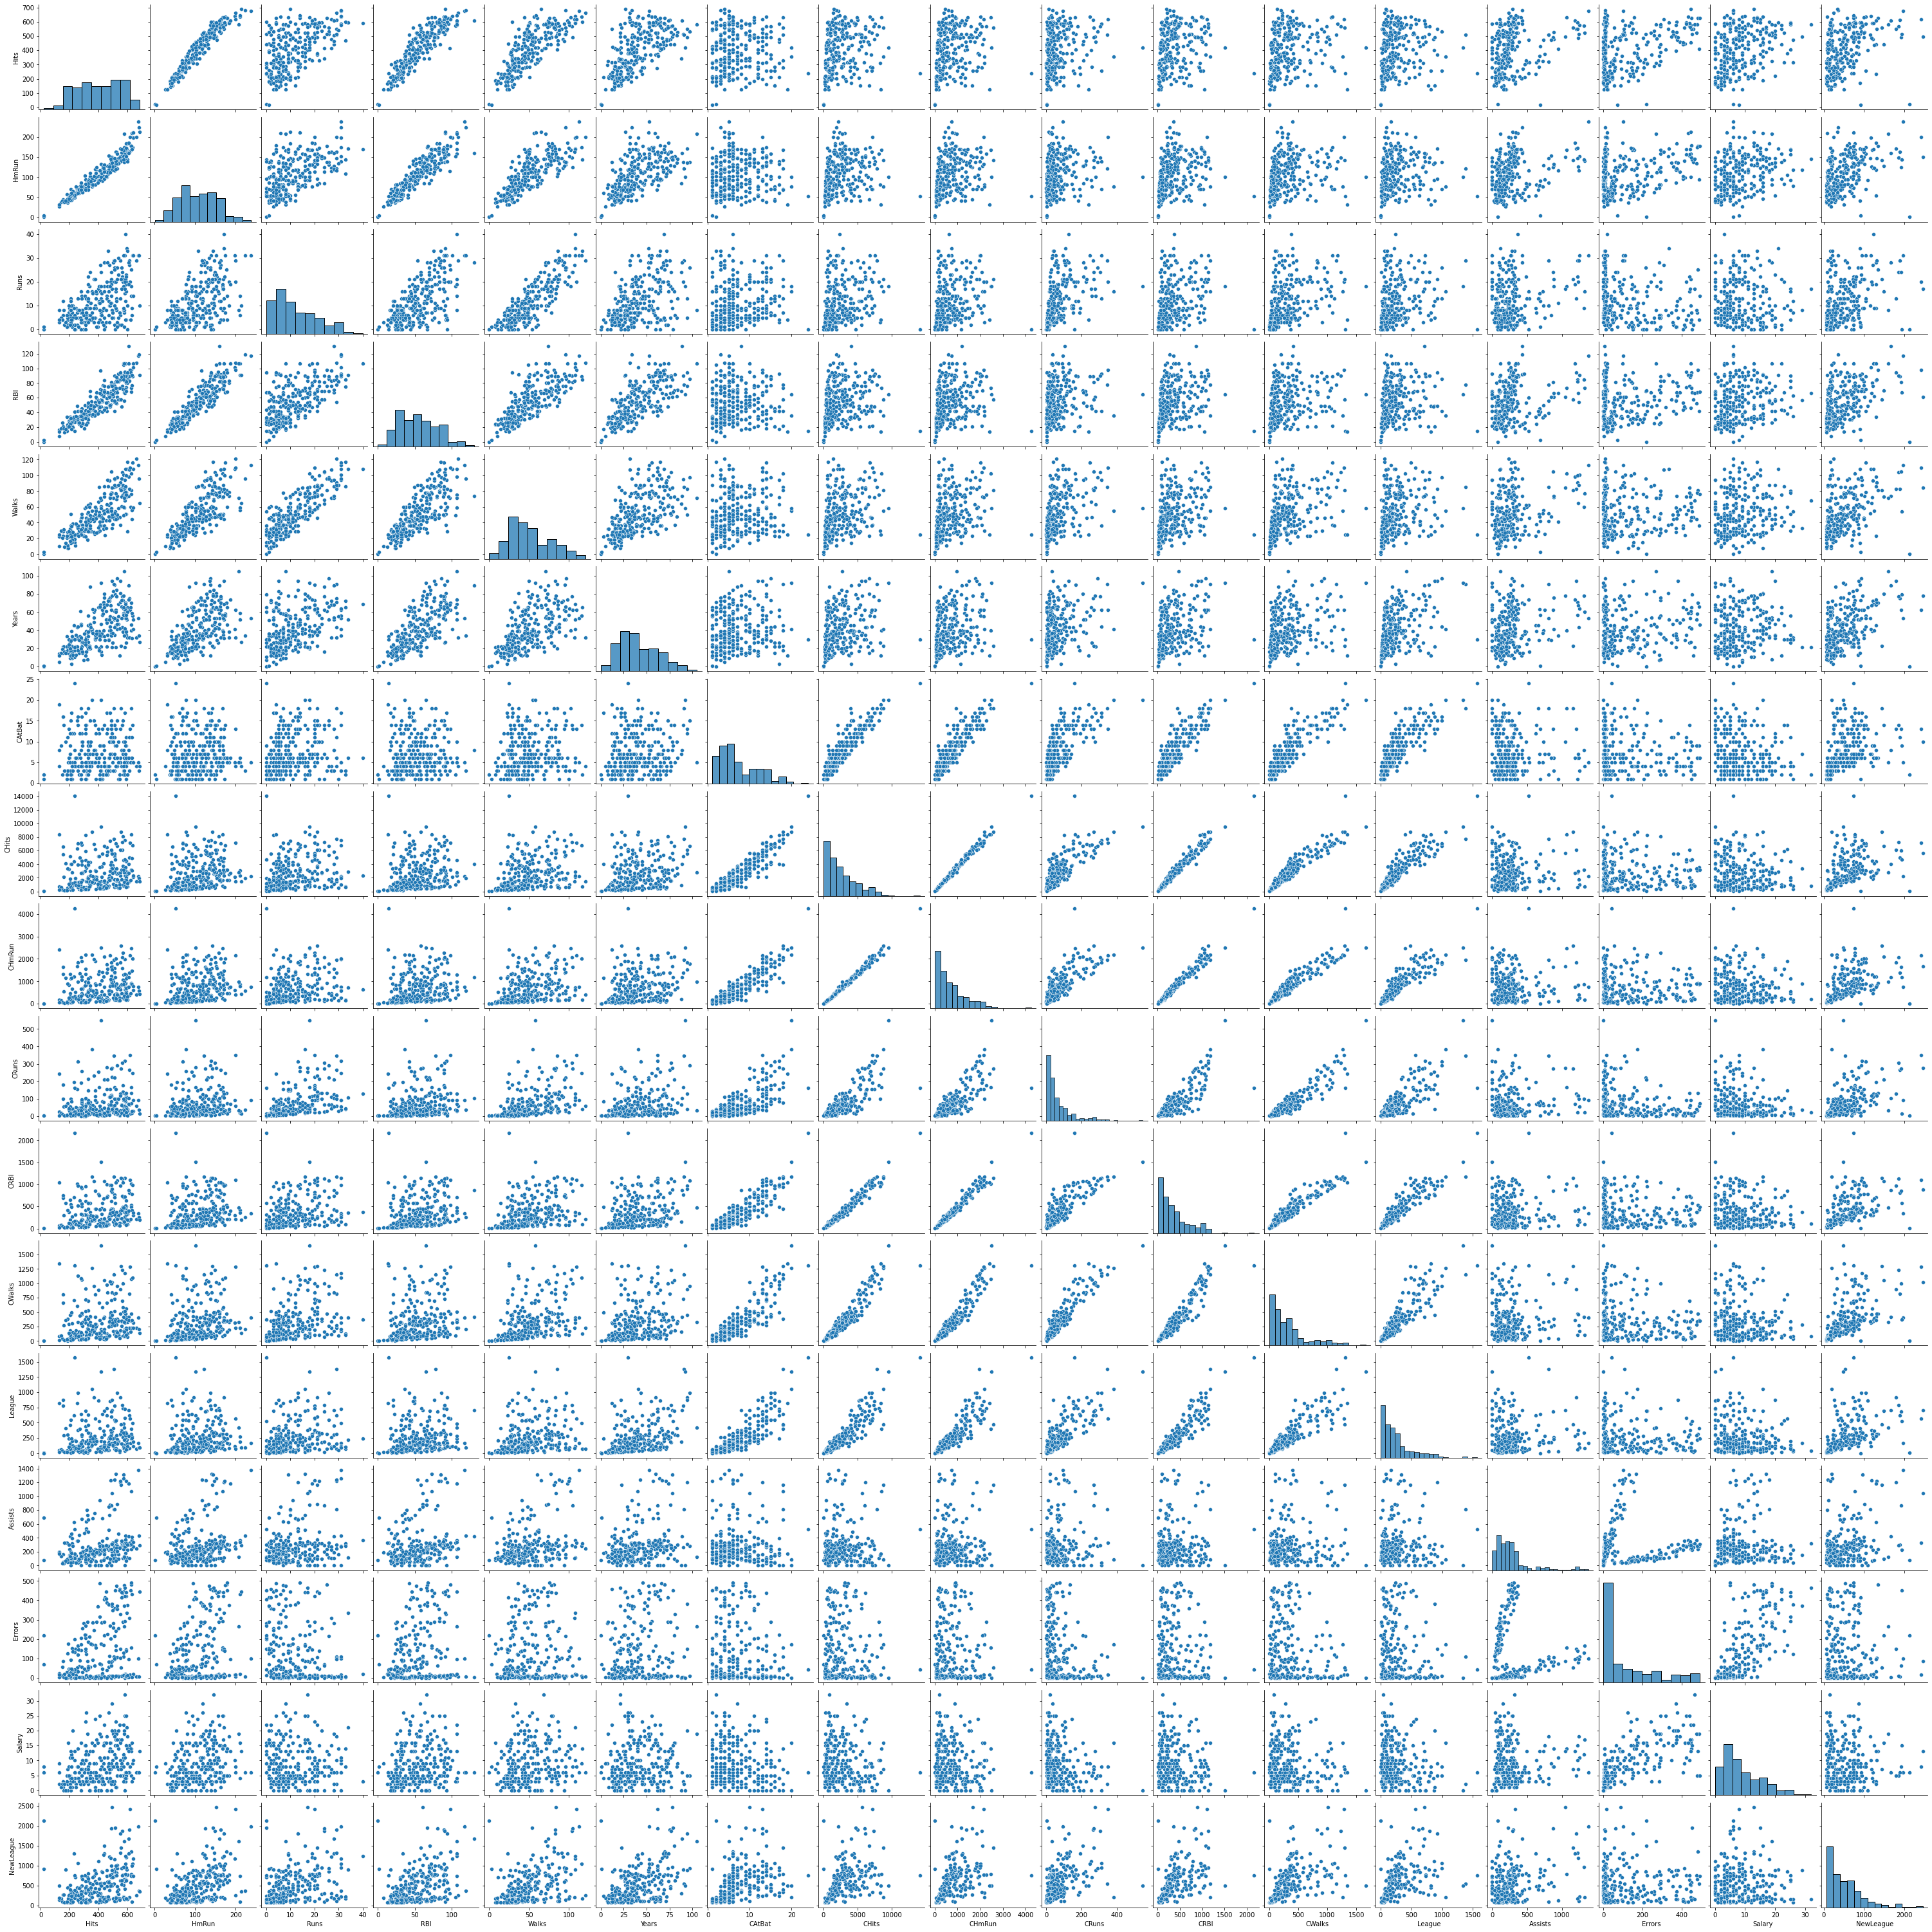

In [10]:
#Correlograma
sns.pairplot(df1, kind="scatter")
plt.show()

#### Conclusiones punto 1

La base de datos para el ejercicio posee 20 variables en total, de las cuales 17 son numéricas y 3 son categóricas. Contiene 322 observaciones de las cuales 59 poseen datos faltantes en la variable NewLeague.

Los histogramas nos muestran que la mayoría de las variables tienen sesgo, es decir, los datos se concentran en un punto en específico; la mayoría de las gráficas están sesgadas hacia la izquierda salvo por Hits y HmRun que se muestran más al centro.

El correlograma nos muestra que para algunos pares de variables la gráfica resultante describe una línea, lo que quiere decir que cada par de estas variables está relacionada entre sí, es decir, hay data redundante entre ellas. Ejemplo de estos casos son las variables CHmRun y CHits. El correlograma también nos muestra que para la mayoría de pares de variables la gráfica resultante son puntos dispersos, es decir, para la mayoría de los casos la correlación entre par de variables es débil.

### 2. Estimación del modelo usando componentes principales (20 puntos)
Estimen un modelo predictivo usando la muestra de entrenamiento usando componentes principales y evalúen su desempeño en la muestra de test.

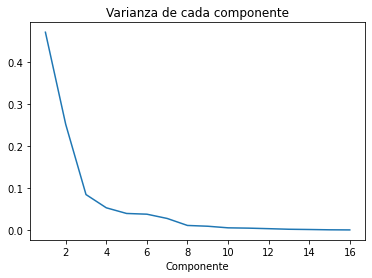

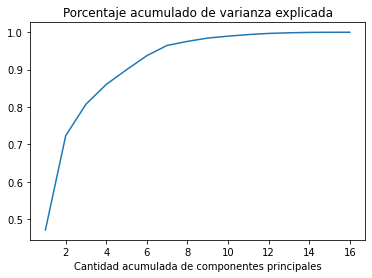

MSE regresión por componentes principales:
15.803680130751866


In [11]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

#Carga de datos
XTotal = df1.drop(['Salary'], axis=1).to_numpy()
yTotal = df1['Salary'].to_numpy()

#Partición de datos
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

#Estimación del modelo usando PCA
scaler = StandardScaler()
scaler.fit(XTrain)
XEscaladoTrain = scaler.transform(XTrain)

p = len(XEscaladoTrain[1, ])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A = pca.components_

varianzaExplicada = pca.explained_variance_
porcentajeVarianzaExplicada = pca.explained_variance_ratio_
plt.plot(range(1, p+1), porcentajeVarianzaExplicada)
plt.xlabel('Componente')
plt.title('Varianza de cada componente')
plt.show()

plt.plot(range(1, p+1), np.cumsum(porcentajeVarianzaExplicada))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

nComponentesElegidas = 14

ZTotalTrain = np.matmul(XEscaladoTrain, A)
ZTrain = ZTotalTrain[:, range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

XEscaladoTest = scaler.transform(XTest)

ZTotalTest = np.matmul(XEscaladoTest, A)
ZTest = ZTotalTest[:, range(nComponentesElegidas)]

prediccionPCA = regPCA.predict(ZTest)
MSEPCA = np.average(np.square(prediccionPCA-yTest))
print('MSE regresión por componentes principales:')
print(MSEPCA)

#### Conclusiones punto 2

En este caso al usar el método de transformación de variables por análisis de componentes principales (PCA) estamos eliminando información redundante pero teniendo en cuenta únicamente la información de los predictores y no necesariamente la relación de estos con la variable de respuesta.

En la gráfica de porcentaje acumulado de varianza explicada se observa que con las primeras 6 componentes principales se está explicando alrededor del 90% de la variabilidad total. Sin embargo, al entrenar y probar el modelo con dicho número de componentes se obtiene un MSE alto (31.45) en comparación con el último obtenido (15.80), el cual logramos escogiendo 14 componentes principales para realizar la regresión lineal.

Por supuesto, el costo de lograr un mejor MSE, es un modelo con una complejidad analítica mayor (más variables explicativas).

### 3. Estimación del modelo usando PCA y el método forward (30 puntos)
Ahora construyan su propio algoritmo para hacer una regresión por componentes principales, en donde primero calculen los componentes y después realicen un proceso de selección de variables secuencial (forward) que permita encontrar el mejor modelo. Todo lo anterior en la muestra de entrenamiento.

Finalmente, evalúen el desempeño en test.

Una vez hecho este procedimiento respondan a la siguiente pregunta:

¿Es el mismo modelo del punto anterior (punto 2)? 

Evaluación del modelo con 1 variable
Evaluación del modelo con 2 variables
Evaluación del modelo con 3 variables
Evaluación del modelo con 4 variables
Evaluación del modelo con 5 variables
Evaluación del modelo con 6 variables
Evaluación del modelo con 7 variables
Evaluación del modelo con 8 variables
Evaluación del modelo con 9 variables
Evaluación del modelo con 10 variables
Evaluación del modelo con 11 variables
Evaluación del modelo con 12 variables
Evaluación del modelo con 13 variables
Evaluación del modelo con 14 variables
Evaluación del modelo con 15 variables
Evaluación del modelo con 16 variables


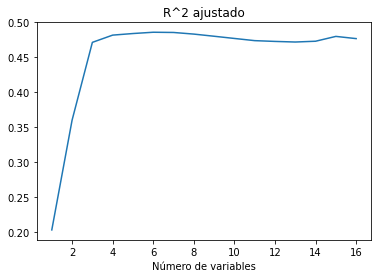

El número de variables seleccionadas es 6 y corresponden a las columnas: [ 2  8 10 11 12 15]
El MSE de la regresión lineal usando las variables seleccionadas por el método forward es: 15.669744579565448


In [12]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

#Estimación del modelo usando PCA y Forward

#Extracto de elementos del punto #2 que se requiere actualizar
nComponentesElegidas = len(XTrain[1, ])
ZTrain = ZTotalTrain[:, range(nComponentesElegidas)]
ZTest = ZTotalTest[:, range(nComponentesElegidas)]

p = len(ZTrain[1, ])
datosTrain = len(yTrain)

r2adj = []

for a in range(1, p+1):
    if(a<(p)):
        sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=a, direction='forward')
        sfs.fit(ZTrain, yTrain)
        ZTrainSeleccionado = sfs.fit_transform(ZTrain, yTrain)
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(ZTrainSeleccionado, yTrain)
        r2Modelo = regAuxiliar.score(ZTrainSeleccionado, yTrain)
        r2adjModelo = 1-(1-r2Modelo)*(datosTrain-1)/(datosTrain-a-1)
        r2adj.append(r2adjModelo)
    else:
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(ZTrain, yTrain)
        r2Modelo = regAuxiliar.score(ZTrain, yTrain)
        r2adjModelo = 1-(1-r2Modelo)*(datosTrain-1)/(datosTrain-a-1)
        r2adj.append(r2adjModelo)
    if(a>1):
        mensaje = ['Evaluación del modelo con', str(a), 'variables']
    else:
        mensaje = ['Evaluación del modelo con', str(a), 'variable']
    
    print(" ".join(mensaje))

plt.plot(range(1, p+1), r2adj)
plt.xlabel('Número de variables')
plt.title('R^2 ajustado')
plt.show()

nVariablesSeleccionadas = np.argmax(r2adj)+1

if(nVariablesSeleccionadas<p):
    sfsElegido = SequentialFeatureSelector(LinearRegression(), n_features_to_select=nVariablesSeleccionadas)
    sfsElegido.fit(ZTrain, yTrain)
    ZTrainSeleccionado = sfsElegido.fit_transform(ZTrain, yTrain)
    modeloFwd = LinearRegression()
    modeloFwd.fit(ZTrainSeleccionado, yTrain)
    variablesSeleccionadas = np.array(range(1, p+1))[sfsElegido.get_support()]
else:
    modeloFwd = LinearRegression()
    modeloFwd.fit(ZTrain, yTrain)
    variablesSeleccionadas = np.array(range(1, p+1))
    
mensaje = ['El número de variables seleccionadas es', str(nVariablesSeleccionadas), 'y corresponden a las columnas:', str(variablesSeleccionadas)]
print(" ".join(mensaje))

prediccionFwd = modeloFwd.predict(ZTest[:, variablesSeleccionadas-1])
MSEFwd = np.average(np.square(prediccionFwd-yTest))
mensaje = ['El MSE de la regresión lineal usando las variables seleccionadas por el método forward es:', str(MSEFwd)]
print(" ".join(mensaje))

#### Conclusiones punto 3

Al combinar transformación de variables por análisis de componentes principales (PCA) con selección de variables secuencial (forward), optimizamos dicha selección secuencial ya que omitimos el problema combinatorio originado por la información redundante entre las variables predictoras. Esto se ve reflejado tanto en el MSE resultante, como en la cantidad de variables a incluir en el modelo, es decir, tiene un mejor desempeño y complejidad analítica significativamente inferior respecto al modelo del punto 1.

Con respecto a la pregunta de si es el mismo modelo del punto anterior, la respuesta es claramente no, como se explica en el parrafo anterior.

### 4. Estimación del modelo de partial least squares (20 puntos)
Predigan usando partial least squares y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [13]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

#Estimación del modelo usando PLS
p = len(XTrain[1, ])

pls = PLSRegression(n_components=p)
pls.fit(XTrain, yTrain)

prediccionPLS = pls.predict(XTest)

prediccionPLS = np.hstack(prediccionPLS)

MSEPLS = np.average(np.square(prediccionPLS-yTest))
print('MSE regresión por partial least squares:')
print(MSEPLS)

MSE regresión por partial least squares:
15.962773809421783


#### Conclusiones punto 4

A utilizar el método de transformación de variables por mínimos cuadrados parciales (PLS) estamos eliminando información redundante teniendo en cuenta la información que los predictores aportan sobre la variable de respuesta, y es en este punto donde radica la fortaleza predictiva de este método con respecto a PCA.

El MSE obtenido con este modelo comprueba lo anterior, ya que es un resultado equiparable a los resultados de los puntos anteriores.

### 5. Estimación de un modelo de penalización (15 puntos)
Predigan usando un modelo de penalización y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

El parámetro de penalización óptimo es:
100.0
El valor del R^2 es:
0.5245817789136997
Los coeficientes estimados son:
[ 0.01349221 -0.07408741  0.03447205  0.02344804  0.05502073 -0.01700926
 -0.20168923 -0.00272225  0.01949515  0.00524274 -0.01665036 -0.00699791
  0.0061297   0.00124894  0.03276708 -0.00088415]


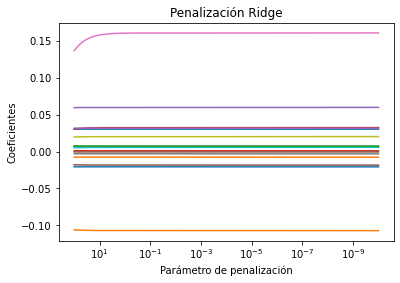

MSE regresión con penalización tipo Ridge:
15.888665537588029


In [14]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

#Estimación del modelo con penalización tipo Ridge
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloRidge = RidgeCV(alphas=alphasCalibrar, store_cv_values=True).fit(XTrain, yTrain)

print('El parámetro de penalización óptimo es:')
print(modeloRidge.alpha_)
print('El valor del R^2 es:')
print(modeloRidge.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloRidge.coef_)

coefs = []
for a in alphasCalibrar:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(XTrain, yTrain)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización Ridge')
plt.axis('tight')
plt.show()

prediccionRidge = modeloRidge.predict(XTest)
MSERidge = np.average(np.square(prediccionRidge-yTest))
print('MSE regresión con penalización tipo Ridge:')
print(MSERidge)

El parámetro de penalización es:
57.384416483023806
El valor del R^2 es:
0.49407651521134355
Los coeficientes estimados son:
[ 0.00010924  0.          0.          0.          0.          0.
 -0.         -0.00015177 -0.          0.         -0.          0.
 -0.          0.0012174   0.03003381 -0.        ]


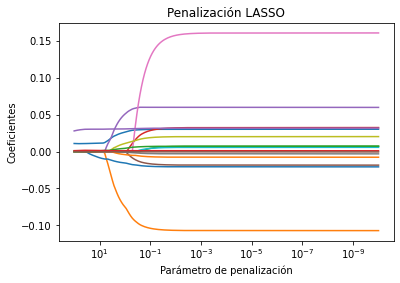

MSE regresión con penalización tipo LASSO:
16.772722115603706


In [15]:
#Estimación del modelo con penalización tipo LASSO
warnings.filterwarnings('ignore')
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloLASSO = LassoCV(alphas=alphasCalibrar).fit(XTrain, yTrain)

print('El parámetro de penalización es:')
print(modeloLASSO.alpha_)
print('El valor del R^2 es:')
print(modeloLASSO.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloLASSO.coef_)

coefs = []
for a in alphasCalibrar:
    lasso = Lasso(alpha=a, fit_intercept=False, max_iter=10000)
    lasso.fit(XTrain, yTrain)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización LASSO')
plt.axis('tight')
plt.show()

prediccionLASSO = modeloLASSO.predict(XTest)
MSELASSO = np.average(np.square(prediccionLASSO-yTest))
print('MSE regresión con penalización tipo LASSO:')
print(MSELASSO)

El parámetro de penalización es:
100.0
El valor del R^2 es:
0.49521354205903223
Los coeficientes estimados son:
[ 0.00037478  0.          0.          0.          0.          0.
 -0.         -0.00015764 -0.          0.         -0.          0.
 -0.          0.00126344  0.03021516 -0.        ]


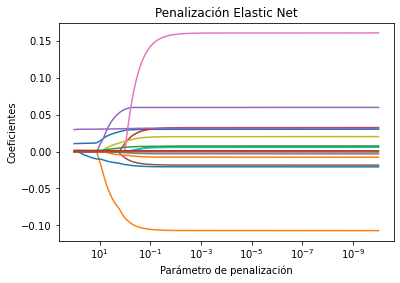

MSE regresión con penalización tipo Elastic Net:
16.658085739276714


In [16]:
#Estimación del modelo con penalización tipo Elastic Net
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloElastic = ElasticNetCV(alphas=alphasCalibrar, cv=5, random_state=0).fit(XTrain, yTrain)

print('El parámetro de penalización es:')
print(modeloElastic.alpha_)
print('El valor del R^2 es:')
print(modeloElastic.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloElastic.coef_)

coefs = []
for a in alphasCalibrar:
    elasticNet = ElasticNet(alpha=a, fit_intercept=False, max_iter=10000)
    elasticNet.fit(XTrain, yTrain)
    coefs.append(elasticNet.coef_)

ax = plt.gca()
ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización Elastic Net')
plt.axis('tight')
plt.show()

prediccionElastic = modeloElastic.predict(XTest)
MSEElastic = np.average(np.square(prediccionElastic-yTest))
print('MSE regresión con penalización tipo Elastic Net:')
print(MSEElastic)

#### Conclusiones punto 5

En este punto decidimos hacer la estimación a través del método de penalización tipo LASSO, ya que, a diferencia del método de penalización tipo Ridge, éste tiene la capacidad de eliminar variables no informativas.

Esto se ve reflejado en el valor de los coeficientes, pues 12 de ellos tienen valor cero, es decir, el modelo solamente usa 4 de 16 variables posibles, obteniendo un MSE de 16.77 en la evaluación.

### 6. Elección del mejor modelo (5 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

(Mostrar gráfico comparativo de MSEs)

De todos los modelos evaluados, el que tiene mejor desempeño es el que combina transformación de variables por análisis de componentes principales (PCA) con selección de variables secuencial (forward).

Creemos que esto se debe a que, como ya se explicó, optimizamos la selección secuencial de variables al omitir el problema combinatorio originado por la información redundante entre las variables predictoras.

De manera general al construir modelos de regresión:
* Si bien el modelo del punto 3 fue con el que se obtuvo un mejor desempeño, creemos que el modelo de penalización por tipo LASSO tiene un gran potencial en su capacidad de eliminar variables no informativas.

* Mantener la complejidad analítica del modelo es clave, pues no vale la pena considerar más variables sobre un modelo, que pueden hacer más complejo su procesamiento computacional y extender su tiempo de ejecución, si el retorno en desempeño es despreciable.